<a href="https://colab.research.google.com/github/bundickm/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Michael_Bundick_linear_algebra_sprint_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [3,2]

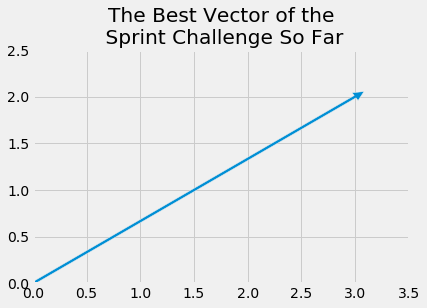

In [3]:
plt.style.use('fivethirtyeight')

plt.xlim(0,3.5)
plt.ylim(0,2.5)

plt.title('The Best Vector of the\n Sprint Challenge So Far')

plt.arrow(0,0,a[0],a[1], width=0.03,head_width=0.1, head_length=0.1)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


The norm of a vector is the magnitude or length of it. We can calculate the norm the same way we calculate the hypotenuse of a triangle $$ c^2 = a^2+b^2....+n^2 $$

In [0]:
def vector_norm(vector):
  return (sum([vector[i]**2 for i in range(len(vector))])**.5)

In [5]:
b = [17, -4, -2, 1]

print('Norm of b:',vector_norm(b))
#print(np.linalg.norm(b)) #just verifying my function

Norm of b: 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
def vector_dot_product(vector1, vector2):
  assert len(vector1) == len(vector2), 'Expected Vectors of Equal Length'
  
  return sum([vector1[i]*vector2[i] for i in range(len(vector1))])

In [7]:
c = [3, 7,-2,12]
d = [9,-7, 4, 6]

print('Dot product of vectors c and d:',vector_dot_product(c,d))
#print(np.dot(c,d)) #just verifying my function

Dot product of vectors c and d: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
def transpose_matrix(matrix):
  return list(map(list, zip(*matrix)))

In [9]:
e = [[7, 4, 2],
     [1, 3,-1],
     [2, 6,-4]]

print('Inverse of E:\n',np.linalg.inv(e))
#transpose_matrix(e) #formatting is better on np's transpose, 
                     #both give same answer though
print('\nTranspose of E:\n',np.transpose(e))

Inverse of E:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

Transpose of E:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


In [10]:
#we can double check inverse is correct by multiplying it by 
#the original matrix this should give us the identity
print(np.matmul(np.linalg.inv(e),e)) #it does with rounding error

[[1.00000000e+00 2.22044605e-16 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:
def mean(a_list):
  return sum(a_list)/len(a_list)

def variance(a_list):
  return sum([((entry-mean(a_list))**2) for entry in a_list])/len(a_list)

def stdv(a_list):
  return (variance(a_list)**.5)

In [12]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4 ]

print('Customers Mean:',mean(customers))
print('Customers Variance:', variance(customers))
print('Customers Standard Deviation:', stdv(customers))

print('\nSnow Mean:', mean(snow))
print('Snow Variance:',variance(snow))
print('Snow Standard Deviation:',stdv(snow))

Customers Mean: 1135.7142857142858
Customers Variance: 84653.06122448981
Customers Standard Deviation: 290.95199127087926

Snow Mean: 2.7142857142857144
Snow Variance: 7.346938775510203
Snow Standard Deviation: 2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

A large positive or negative covariance indicates a strong relationship between two variables. However, you can't necessarily compare covariances between sets of variables that have a different scale, since the covariance values are unbounded, they could take on arbitrarily high or low values. This means that you can't compare the covariances between variables that have a different scale. A variable that has a large scale will always have a higher covariance than a variable with an equally strong relationship, yet smaller scale. In the case of Customers and Snow, they are not comparable because of this large scale difference. If you calculate the correlation coefficient for the two vectors then you would be able to compare them.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [13]:
print('Variance-Covariance Matrix of Customers and Snow:\n',np.cov(customers, snow))

Variance-Covariance Matrix of Customers and Snow:
 [[9.87619048e+04 6.70238095e+02]
 [6.70238095e+02 8.57142857e+00]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [14]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [15]:
#drop Country so only numeric is passed to PCA
df = df.drop('Country', axis=1)
df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


### Standardize the Data

In [0]:
#imports
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [17]:
#standardize the data
scaler = StandardScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df))
scaled.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [18]:
#use the standardized data to perform PCA
pca = PCA(2) #2 PC's because that is what is asked for for graphing
pca.fit(scaled)
pca_df = pd.DataFrame(pca.transform(scaled), columns=['PC 1', 'PC 2'])

pca_df.head()

,PC 1,PC 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


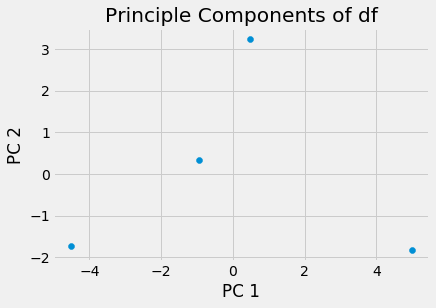

In [19]:
#Such an exciting graph!
plt.title('Principle Components of df')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.scatter(pca_df['PC 1'], pca_df['PC 2'])
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [20]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


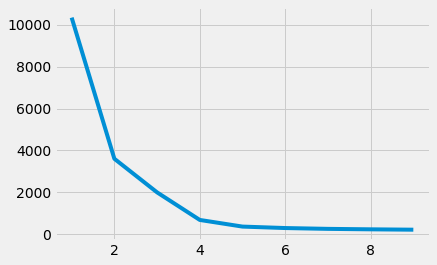

In [21]:
#originally read the elbow plot for 2 clusters, 
#but the data below seems to be best at 5
distortions = []
k = range(1,10)
#fit a model from 1 to 10 clusters, and plot it to view inflections
for i in k:
  k_model = KMeans(n_clusters=i).fit(points)
  distortions.append(k_model.inertia_)
  
plt.plot(k,distortions)
plt.show()

In [22]:
#train and fit a model with n_clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)

#check to see our labels
labels = kmeans.labels_
print(labels)

[3 0 4 3 4 0 3 3 2 0 0 0 4 0 3 4 3 0 0 1 3 1 1 1 0 0 4 2 0 0 0 0 4 1 0 0 0
 0 2 4 4 1 2 2 2 0 0 0 3 4 1 3 3 2 1 4 0 2 2 3 1 4 3 2 1 2 1 2 3 2 0 0 0 0
 1 1 0 0 2 1 2 0 0 0 2 0 2 0 0 1 2 0 1 0 4 0 0 0 0 4 0 0 3 0 0 1 3 3 3 1 4
 1 0 3 4 0 2 2 1 2 1 4 0 3 0 3 0 1 2 3 4 3 0 3 2 2 4 1 3 0 2 0 0 1 4 2 0 2
 3 0 0 4 3 1 0 2 4 1 0 3 4 0 2 3 1 1 4 2 4 4 3 4 2 1 4 0 0 0 0 3 0 4 0 0 4
 0 3 1 2 4 0 3 1 3 0 2 1 1 4 4]


In [23]:
#add our labels to the data frame
points['clusters'] = labels

#look at what we have
points.sample(5)

,x,y,clusters
95,-4.305531,-8.529072,0
60,4.789877,3.397964,1
136,-0.723168,-10.210108,4
28,-4.606712,-8.366558,0
128,-3.231208,3.402604,2


In [0]:
# Plotting clusters function from lecture, why reinvent the wheel
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'blue',3:'orange',4:'purple'}
  fig, ax = plt.subplots()
  plt.title('k-means clustering')
  
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  ax.plot(centroids.iloc[4].x, centroids.iloc[4].y, "ok")
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', 
               label=key, color=colors[key])
  plt.show()

In [0]:
def get_centroids(df,column):
  return df.groupby(column).mean()

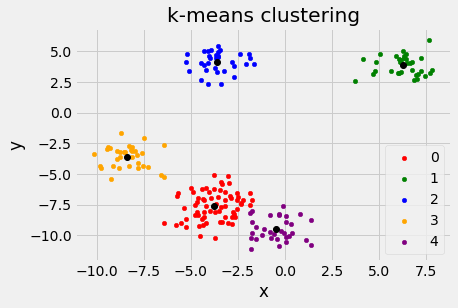

In [26]:
#plot it
#As mentioned above, originally plotted with 2 but it
#definitely looks like 5 clusters upon visual inspection
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters',centroids)